# Foundations of Data Science
Winter 2025
Group 17

## Team members
- Jack (Xianguo) Hao
- Kunwar Dhruv Sethi
- Eric Ramalheiro
- Lucas Hele
- Faiza Qayoom
- Miguel Morales

## **Import Modules**

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## **Read data**

In [5]:

df = pd.read_csv('../data/cost_of_living_us.csv', na_values = '\xa0')

## **Inspect Data** 

- Check for missing values and Garbage values

In [6]:
# Note - Columns 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31420 non-null

In [7]:
# Note - Describe for int / float values

df.describe()

,case_id,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
count,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31420.000000
mean,1589.311804,11073.673539,8287.504557,13593.856381,13394.031748,7015.318377,9879.584233,7657.714782,70901.683601,68315.997017
std,917.218414,4165.606147,3271.140249,1640.456562,5204.545710,2397.415490,6778.223399,3339.795571,21846.545235,16886.970245
min,1.000000,4209.311280,2220.276840,2216.461440,3476.379960,2611.642080,0.000000,1027.800756,30087.662400,25529.976562
25%,792.000000,8580.000000,5801.424360,12535.159800,9667.440000,5286.354120,5341.621590,5597.970360,53776.019400,57223.988281
50%,1593.000000,10416.000000,8129.156280,13698.164400,13082.700000,6733.056120,10166.340120,6898.468860,70977.682800,65955.605469
75%,2386.000000,12444.000000,10703.624280,14765.758500,16657.816800,8413.090230,14276.377800,8790.207270,85371.341100,76136.070312
max,3171.000000,61735.587600,31178.619600,19816.482000,37252.274400,28829.443200,48831.085200,47753.390400,223717.548000,177662.468750


In [8]:
#Note - Data describe for Object values

df.describe(include=['O'])

,state,areaname,county,family_member_count
count,31430,31430,31430,31430
unique,51,2561,1877,10
top,TX,"Atlanta-Sandy Springs-Roswell, GA HUD Metro FM...",Washington County,1p0c
freq,2540,240,300,3143


In [9]:
# Duplicate Data 


duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.count()

case_id                   0
state                     0
isMetro                   0
areaname                  0
county                    0
family_member_count       0
housing_cost              0
food_cost                 0
transportation_cost       0
healthcare_cost           0
other_necessities_cost    0
childcare_cost            0
taxes                     0
total_cost                0
median_family_income      0
dtype: int64

In [10]:
# Null Data

df.isnull().sum()

case_id                    0
state                      0
isMetro                    0
areaname                   0
county                     0
family_member_count        0
housing_cost               0
food_cost                  0
transportation_cost        0
healthcare_cost            0
other_necessities_cost     0
childcare_cost             0
taxes                      0
total_cost                 0
median_family_income      10
dtype: int64

**Observations:**

1. The data set contains 31430 rows and 15 columns 
2. Max case_id value is 3171, however each row should have unique value and max value should be 31430 does this mean there are duplicate case_id values, and if yes what does that mean ? Additionally, as per duplicate check there are no duplicate rows. Further analysis is required and also if it would make sense to type cast this column to string / object.
3. Childcare_cost has $0 values - does that mean there is missing values ?
4. There are 51 unique state values - further investigation is required, considering there are 50 States in United States
5. Does values in 'areaname' columns are concatenated ? for instance 'Atlanta-Sandy.. ' and 'GA HUD Metro ..' is same area name or separate areanames
6. values in family_member_count also requires further investigation as it seems values in this field are coded. For instance does 1p0c means 1 person and no child ? if yes, this column is good candidate for Feature Engineer i.e. split parent and childrens information. 
7. there are 10 ( 0.03% ) rows where median_family_income is Null. Potentially can drop these rows 10 rows without as the count is not significant (however will inspect for any pattern of Null rows i.e. all from same state/county etc.)

### Rough work 

In [11]:
# Note - investigating case_id

df[df['case_id'] == 3].head(3)

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
20,3,AL,False,"Barbour County, AL",Barbour County,1p0c,5856.0,3237.03924,10890.72876,5686.79004,3294.76680,0.00000,5458.27740,34423.6020,42822.753906
21,3,AL,False,"Barbour County, AL",Barbour County,1p1c,7776.0,4770.60900,11436.48264,8495.95680,4546.13124,4846.73616,5425.51176,47297.4288,42822.753906
22,3,AL,False,"Barbour County, AL",Barbour County,1p2c,7776.0,6989.73852,12036.79440,11305.12356,5350.20960,11644.67508,6235.30884,61337.8476,42822.753906


In [12]:
# According to the original kaggle dataset, case_id is defined as: 'Unique identifier for each areaname.'
# However, there are 3171 case_id's (or at least that's the largest value for case_id - maybe they're not all consecutive),
# and there are only 2561 areaname values - something is missing here.

# Theory: cased_id refers to the unique identifier for each unique 2-tuple of (areaname,county) and a lot of the county names are duplicated.

df['case_id'].nunique()

3143

In [13]:
# There are 28 missing - how strange

# case_id ranges between 1 and 3171
missing_case_id = {i+1 for i in range(3171)} - set(df['case_id'].value_counts().keys().to_list())
missing_case_id

{310,
 311,
 315,
 317,
 318,
 320,
 1187,
 1195,
 1202,
 1203,
 1230,
 1232,
 1233,
 1234,
 1237,
 1242,
 1245,
 1247,
 1250,
 1251,
 1252,
 1793,
 1794,
 1797,
 1798,
 1799,
 2342,
 2345}

In [14]:
# Well that's not a random subset - it's far too clustered.

# Speculation - case_id could be some univerally agreed upon numbering system for identifying locations with numbers, and we happen to not have any data for those missing 28 locations.
# Alternatively, we could be missing data - the url of the kaggle dataset does specify 3171 counties, even though the current name is only 1877 counties.
    # It's possible that the initial version had more data, but perhaps was missing data or had null values.
    # later versions had cleaning performed which resulted dropping rows and now we have no data for those 28 areanames.
    # On the other hand, the maximum value of case_id is 3171, so maybe this was simply a typo when the dataset was initially posted.

# Moving on, how many 2-tuples of (areaname,county) are there?

df.groupby(['areaname', 'county']).count()

case_id  state  \
areaname                             county                             
Abbeville County, SC                 Abbeville County       10     10   
Abilene, TX MSA                      Callahan County        10     10   
                                     Jones County           10     10   
                                     Taylor County          10     10   
Acadia Parish, LA HUD Metro FMR Area Acadia Parish          10     10   
...                                                        ...    ...   
Yuma County, CO                      Yuma County            10     10   
Yuma, AZ MSA                         Yuma County            10     10   
Zapata County, TX                    Zapata County          10     10   
Zavala County, TX                    Zavala County          10     10   
Ziebach County, SD                   Ziebach County         10     10   

                                                       isMetro  \
areaname                             county                      
Abbeville County, SC                 Abbeville County       10   
Abilene, TX MSA                      Callahan County        10   
                                     Jones County           10   
                                     Taylor County          10   
Acadia Parish, LA HUD Metro FMR Area Acadia Parish          10   
...                                                        ...   
Yuma County, CO                      Yuma County            10   
Yuma, AZ MSA                         Yuma County            10   
Zapata County, TX                    Zapata County          10   
Zavala County, TX                    Zavala County          10   
Ziebach County, SD                   Ziebach County         10   

                                                       family_member_count  \
areaname                             county                                  
Abbeville County, SC                 Abbeville County                   10   
Abilene, TX MSA                      Callahan County                    10   
                                     Jones County                       10   
                                     Taylor County                      10   
Acadia Parish, LA HUD Metro FMR Area Acadia Parish                      10   
...                                                                    ...   
Yuma County, CO                      Yuma County                        10   
Yuma, AZ MSA                         Yuma County                        10   
Zapata County, TX                    Zapata County                      10   
Zavala County, TX                    Zavala County                      10   
Ziebach County, SD                   Ziebach County                     10   

                                                       housing_cost  \
areaname                             county                           
Abbeville County, SC                 Abbeville County            10   
Abilene, TX MSA                      Callahan County             10   
                                     Jones County                10   
                                     Taylor County               10   
Acadia Parish, LA HUD Metro FMR Area Acadia Parish               10   
...                                                             ...   
Yuma County, CO                      Yuma County                 10   
Yuma, AZ MSA                         Yuma County                 10   
Zapata County, TX                    Zapata County               10   
Zavala County, TX                    Zavala County               10   
Ziebach County, SD                   Ziebach County              10   

                                                       food_cost  \
areaname                             county                        
Abbeville County, SC                 Abbeville County         10   
Abilene, TX MSA                      Callahan County          10   
                                   

In [15]:
# Since there are 3143 rows of the above grouped dataframe, there are in fact 3143 different 2-tuples of (areaname, county).
# This is precisely the number of different case_id's, so we just need to check that they perfectly overlap.

# But first, why are they all 10?

df.groupby(['areaname', 'county']).count()['case_id'].value_counts()

case_id
10    3143
Name: count, dtype: int64

In [16]:
# I guess we have exactly 10 rows per case_id.

# Anyway, if we group by case_id, areaname, and county and end up with exactly 3143 rows again, then that's this mystery solved.
df.groupby(['case_id', 'areaname', 'county']).count().shape

(3143, 12)

Therefore, the attribute 'case_id' refers not to the index of the row, but instead a unique numeric identifier for each unique ('areaname', 'county') 2-tuple. The values that 'case_id' takes range between 1 and 3171, however, 28 numbers are skipped as there are only 3143 unique values. Further investigation is required to explain this.

There is also exactly 10 rows of data per 'case_id' value.

In [17]:
# childcare cost is sometimes 0 - is this a problem? are there missing values?
# if there aren't any children in the household, then it would make sense that the childcare costs are also 0.
# if these are the only instances of 0 childcare costs, then there is no problem.

df[df['childcare_cost'] == 0]['family_member_count'].value_counts()

family_member_count
1p0c    3143
2p0c    3143
Name: count, dtype: int64

In [18]:
# and that is exactly the case.

# ... why are those numbers exactly 10% of our dataset?

df['family_member_count'].value_counts()

family_member_count
1p0c    3143
1p1c    3143
1p2c    3143
1p3c    3143
1p4c    3143
2p0c    3143
2p1c    3143
2p2c    3143
2p3c    3143
2p4c    3143
Name: count, dtype: int64

In [19]:
# So there are exactly 10 rows per case_id and each family_member_count is represented exactly 1/10th of the time - is this related?

df.groupby(['family_member_count', 'case_id']).count().shape

(31430, 13)

The attribute 'childcare_cost' is sometimes 0, which is a red flag. However, it only occurs when the household happens to have no children, so it's entirely reasonable (also, it's always 0 when the household has no children).

Also, family_member_count has only 10 different possible values, each represented by a tenth of the total dataset. Furthermore, for each value of case_id, there are 10 rows - and each of these rows has one of the different values of 'family_member_count'.

In [20]:
# There are 51 states in our dataset, but aren't there only 50?

us_states = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", "CA": "California", 
    "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware", "FL": "Florida", "GA": "Georgia",
    "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana", "IA": "Iowa",
    "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland",
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi", "MO": "Missouri",
    "MT": "Montana", "NE": "Nebraska", "NV": "Nevada", "NH": "New Hampshire", "NJ": "New Jersey",
    "NM": "New Mexico", "NY": "New York", "NC": "North Carolina", "ND": "North Dakota", "OH": "Ohio",
    "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island", "SC": "South Carolina",
    "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas", "UT": "Utah", "VT": "Vermont",
    "VA": "Virginia", "WA": "Washington", "WV": "West Virginia", "WI": "Wisconsin", "WY": "Wyoming"
}

df_states = set(df['state'].value_counts().keys().to_list())
# get the states in our dataset as a set
fifty_states = set(us_states.keys())
# get the actual 50 states as a set
df_states - fifty_states
# perform set subtraction to determine the extra state

{'DC'}

Apparently DC isn't a state, but it's counted as one for these purposes. Perhaps we should rename the column to 'states (and DC)'? Or for the purposes of brevity, maybe we just leave it as is.

In any case, nothing is missing or there aren't any typos in this part of the data.

In [21]:
# The 10 rows with null values for median_family_income - each case_id value has 10 rows - is this a coincidence?

df[df['median_family_income'].isnull()]

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
15110,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p0c,8052.0,3019.16160,11086.4934,6505.34988,4011.51852,0.00000,6075.80856,38750.3316,NaN
15111,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p1c,11256.0,4449.51084,11722.2708,9930.74856,5690.72604,7555.66332,7196.82420,57801.7440,NaN
15112,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p2c,11256.0,6519.27612,12405.8652,13356.14640,6440.68356,14323.03800,8732.72244,73033.7340,NaN
15113,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p3c,14688.0,8697.00216,12854.8620,16781.54400,8473.30884,16405.30800,11755.84356,89655.8676,NaN
15114,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p4c,14688.0,10645.71900,13619.9388,20206.94280,9179.40600,16405.30800,12372.99120,97118.3088,NaN
15115,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p0c,8772.0,5535.13032,12918.5988,13010.70000,5184.03768,0.00000,7023.17208,52443.6384,NaN
15116,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p1c,11256.0,6889.02612,13557.9828,16436.09760,6574.65816,7555.66332,8939.94504,71209.3716,NaN
15117,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p2c,11256.0,8724.80352,13977.7980,19861.49760,7239.83280,14323.03800,9841.96872,85224.9372,NaN
15118,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p3c,14688.0,10652.32248,14798.7552,23286.89520,9181.79808,16405.30800,11854.97676,100868.0508,NaN
15119,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p4c,14688.0,13035.88920,14802.7416,26712.29280,10045.45896,16405.30800,12050.91480,107740.6056,NaN


The 10 missing values for 'median_family_income' all come from the same case_id (and in particular, all the rows for that case_id value has this data missing).

## **Data Enrichment**

## **Data Transformation / Feature Engineering**

New fields :
1. delta_cost_of_living = Difference in calculated Cost of Living - total_cost [Note: should be 0 for all rows]
2. family_size = Parents + Children 
3. house_hold_size = if family_size is 1 then single (0) else family ())
4. Full state Name - 'state' only has state code (e.g. AL instead of Alabama) 

In [22]:
# Is there any difference between Cost of Living and Total Cost ?

df['total_cost_calculated'] = df['housing_cost'] + df['food_cost'] + df['transportation_cost'] + df['healthcare_cost'] + df['other_necessities_cost'] + df['childcare_cost'] + df['taxes']

df['delta_total_cost'] = df['total_cost_calculated'] - df['total_cost']
df['delta_total_cost'] = df['delta_total_cost'].astype(int)

df[(df['delta_total_cost'] < 0 ) | (df['delta_total_cost'] > 0) ].head(3)

df.groupby(['delta_total_cost'])['delta_total_cost'].sum()


# conclusion total_cost is summation of all types of costs available in the data set. 

delta_total_cost
0    0
Name: delta_total_cost, dtype: int32

In [23]:
# Drop calculated columns 
df = df.drop(['delta_total_cost','total_cost_calculated'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31420 non-null

In [24]:
# Map state codes to state names
df['state_name'] = df['state'].map(us_states)

df.head(3)

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,state_name
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,Alabama
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,Alabama
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,Alabama


In [25]:
# Since family_member_count is highly structured, we don't need to do anything fancy to extract the number of parents/children.

df['parent_count'] = df['family_member_count'].str[0].astype(int)
df['children_count'] = df['family_member_count'].str[2].astype(int)
df['family_size'] = df['parent_count'] + df['children_count']

df.head(10)

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,state_name,parent_count,children_count,family_size
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,Alabama,1,0,1
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,Alabama,1,1,2
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,Alabama,1,2,3
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062,Alabama,1,3,4
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062,Alabama,1,4,5
5,1,AL,True,"Montgomery, AL MSA",Autauga County,2p0c,10180.29420,6334.01436,12861.88680,11474.95968,5983.78524,0.0000,8236.73076,55071.6684,73010.414062,Alabama,2,0,2
6,1,AL,True,"Montgomery, AL MSA",Autauga County,2p1c,12067.50240,7883.31888,13589.11200,14397.03720,7228.96944,6147.8298,9459.90240,70773.6744,73010.414062,Alabama,2,1,3
7,1,AL,True,"Montgomery, AL MSA",Autauga County,2p2c,12067.50240,9984.05268,14723.60760,17319.11280,7990.14840,15824.6940,11168.75028,89077.8696,73010.414062,Alabama,2,2,4
8,1,AL,True,"Montgomery, AL MSA",Autauga County,2p3c,15257.15040,12189.77040,14994.60000,20241.18720,9945.10176,18802.1892,13210.14840,104640.1524,73010.414062,Alabama,2,3,5
9,1,AL,True,"Montgomery, AL MSA",Autauga County,2p4c,15257.15040,14917.35840,15064.26360,23163.26520,10933.41504,18802.1892,13417.21920,111554.8596,73010.414062,Alabama,2,4,6


In [26]:
df.groupby(['family_member_count']).agg(count_all = ('family_size', 'sum'),
    cnt_children = ('children_count', 'sum'),
    cnt_parent = ('parent_count', 'sum'),
)

,count_all,cnt_children,cnt_parent
family_member_count,,,
1p0c,3143,0,3143
1p1c,6286,3143,3143
1p2c,9429,6286,3143
1p3c,12572,9429,3143
1p4c,15715,12572,3143
2p0c,6286,0,6286
2p1c,9429,3143,6286
2p2c,12572,6286,6286
2p3c,15715,9429,6286


In [27]:
# Calculate contributor percentage
df["Housing_%"] = (df["housing_cost"] / df["total_cost"]) * 100
df["Transportation_%"] = (df["transportation_cost"] / df["total_cost"]) * 100
df["Healthcare_%"] = (df["healthcare_cost"] / df["total_cost"]) * 100

### **Analysis**

#### **Metropolitan vs. Non-Metropolitan Areas: Miguel**

#### **Key Expense Categories: Dhruv**


Hypothesis:
Housing, transportation, and healthcare are the primary contributors to the cost of living. In metropolitan areas, housing tends to be the most significant expense, driven by high demand and limited supply. Transportation costs also tend to be higher in cities with less access to public transit. Non-metropolitan areas may see higher costs in some categories, but they often experience lower housing and transportation costs relative to income.

Objective: 
1. show contributors / total_cost for each county and do state comparison 
2. Analyse between Metros of different states
3. Use Pivot, bar, charts, or maps if possible 

In [59]:
# State-wise comparison using pivot table
state_pivot = df.groupby("state_name")[["Housing_%", "Transportation_%","Healthcare_%"]].mean()


In [54]:
state_pivot.head(3)

,Housing_%,Transportation_%,Healthcare_%
state_name,,,
Alabama,13.736108,20.434823,20.331864
Alaska,18.788044,15.778259,18.296453
Arizona,17.225834,19.132744,18.889133


In [63]:
# rough work
x = df.groupby("state_name")[['housing_cost','transportation_cost','healthcare_cost','total_cost']].sum()
x

,housing_cost,transportation_cost,healthcare_cost,total_cost
state_name,,,,
Alabama,6.151533e+06,8.804851e+06,9.538317e+06,4.620827e+07
Alaska,4.500924e+06,3.584899e+06,4.536127e+06,2.471802e+07
Arizona,1.919087e+06,2.021937e+06,2.179872e+06,1.139789e+07
Arkansas,6.664866e+06,9.848946e+06,9.028884e+06,4.611892e+07
California,1.173484e+07,8.549299e+06,8.248466e+06,5.404391e+07
Colorado,9.045399e+06,9.354260e+06,6.673549e+06,4.966130e+07
Connecticut,1.356285e+06,1.088537e+06,1.046820e+06,7.201080e+06
Delaware,4.334937e+05,3.996134e+05,4.299202e+05,2.445166e+06
Florida,8.821648e+06,8.691383e+06,9.074274e+06,4.791955e+07


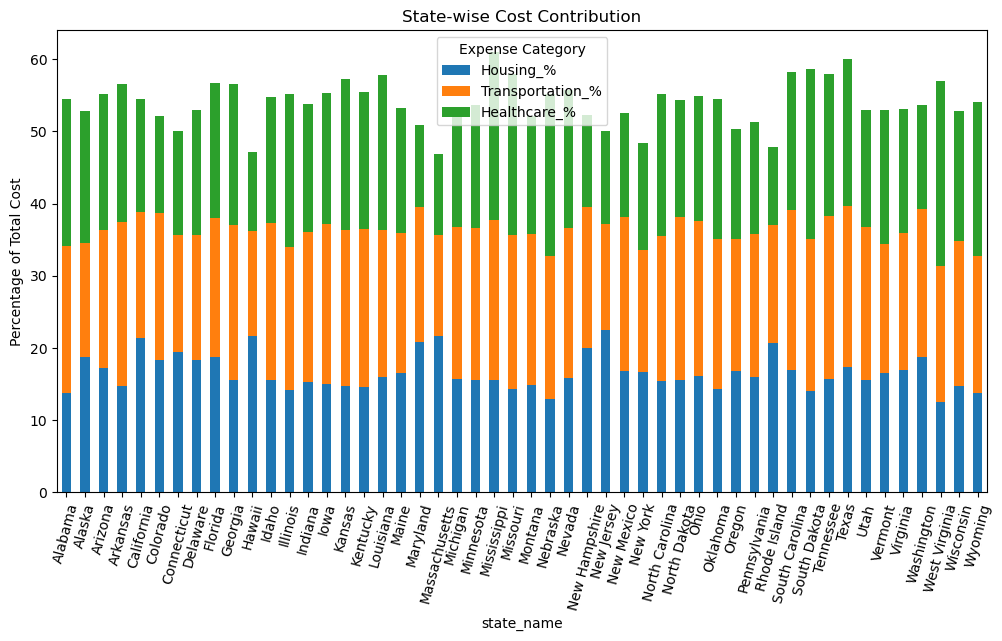

In [56]:
# Plotting state-wise cost contribution
state_pivot.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("State-wise Cost Contribution")
plt.ylabel("Percentage of Total Cost")
plt.legend(title="Expense Category")
plt.xticks(rotation=75)
plt.show()


Observations:

1. Housing cost is not the biggest contribution in total cost, rather Healthcare and transportation cost is - ?

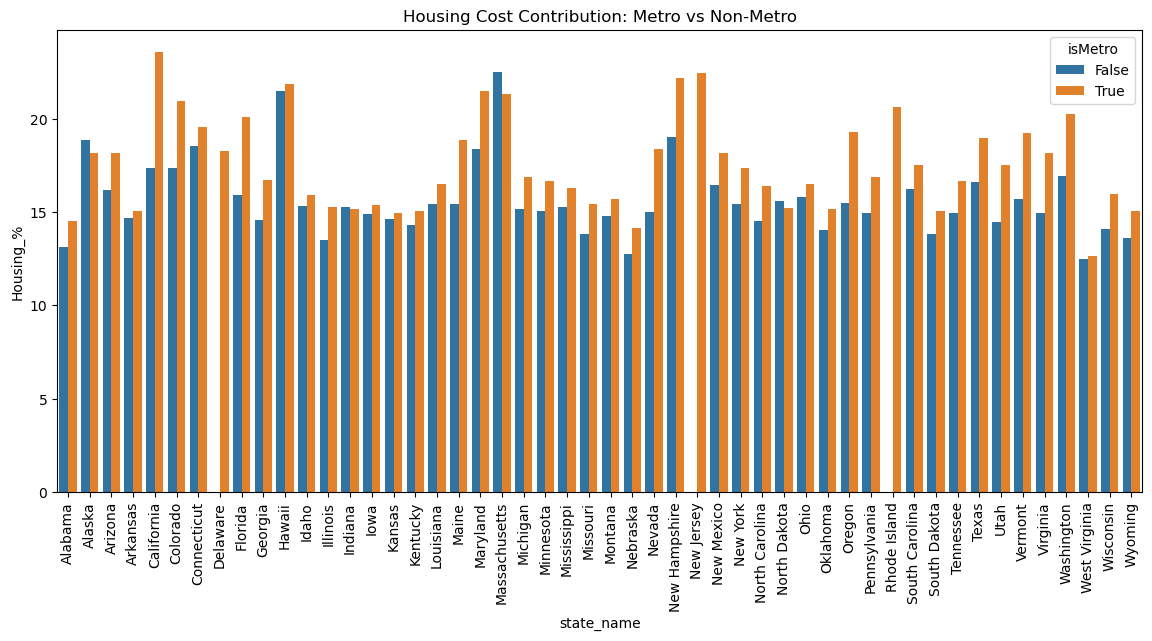

In [53]:
# Metro vs Non-Metro comparison
metro_pivot = df.groupby(['state_name', 'isMetro'])[["Housing_%", "Transportation_%", "Healthcare_%"]].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(x="state_name", y="Housing_%", hue="isMetro", data=metro_pivot)
plt.title("Housing Cost Contribution: Metro vs Non-Metro")
plt.xticks(rotation=90)
plt.show()

#### **Cost of Living and Household Size: Faiza**

#### **Exploring Linearity (or Non-Linearity) of Costs as a Function of Household Size: Eric**

#### **Regional Variation: Jack**

#### **Individual Expense Categories: Lucas**